In [36]:
import math
from IPython.display import Image

In [37]:
# Thrust 
F = 66.7233
#Specific Heat
kc = 1.1232
kt = 1.1188
ke = 1.1068
kn = 1.2
#O/F Ratio
OF = 2
#Exit Pressure (atm)
Peatm = 1
#Temperatures (K)
T0 = 3463
Te = 2912.50
#Molar Weight at Throat (mwt, from NASA CEA)
mwt=22.334
#Chamber Pressure (psi)
p0psi = 150

# **Convert All Units**

In [38]:
Pe = Peatm * 101325
p0 = p0psi * 6894.76
print(f' Pe: {Pe}')
print(f' P0: {p0}')

 Pe: 101325
 P0: 1034214.0


# **Exhaust Gas Constant, $R$**

## **$R=\frac{R_u}{M}=\frac{8314}{M}$**

In [39]:
R=(8314/mwt)
print(R)

372.25754455090896


# **Temperature at Throat**

## **$T_t=\frac{2T_0}{k+1}$**

In [40]:
Tt=(2*T0)/(kt+1)
print(Tt)

3268.8314140079287


# **Local Speed of Sound at Throat**

## **$a=\sqrt{kRT_t}$** 

In [41]:
vt=math.sqrt(kt*R*Tt)
print(vt)

1166.7941540092356


# **Exit Velocity**

# **$v_e=\sqrt{\frac{2k}{k-1}RT_0[1-(\frac{P_e}{P_0})^\frac{(k-1)}{k}]}$**

In [42]:
ve=math.sqrt((((2*ke)/(ke-1))*R*T0)*(1-((Pe/p0)**((ke-1)/ke))))
print(ve)

2316.380341161543


# **Mass Flow Rate**

## **$ṁ=\frac{F}{v_2}=\frac{F}{\sqrt{\frac{2k}{k-1}RT_0[1-(\frac{P_e}{P_0})]^\frac{(k-1)}{k}}}$**

In [43]:
mdot= F/ve
print(f'mass flow rate: {mdot}')

mass flow rate: 0.028804984576298796


## **$ṁ=\frac{P_cA^s}{\sqrt{\frac{RT_c}{k}}}[\frac{k+1}{2}]^\frac{2(k-1)}{k+1}$**

# **Specific Volume at Nozzle Inlet ($V_1$ and $V_0$)**

## **$V_1=\frac{(RT_0)}{p_0}$**~$V_0$

In [44]:
V1=(R*T0)/p0
print(V1)

1.2464807832612959


# **Specific Volume at Nozzle Throat (Vt)**

## **$V_t=V_1[\frac{(k+1)}{2}]^\frac{1}{(k-1)}$**

In [45]:
Vt=V1*(((kt+1)/2)**(1/(kt-1)))
print(Vt)

2.0259470201783327


# **Exit Specific Volume**

## **$V_e=V_1(\frac{p_0}{P_e})^\frac{1}{k}$**

In [46]:
Ve=V1*((p0/Pe)**(1/ke))
print(Ve)

10.167795136604516


# **Throat Area**

## **$A_{t}=\frac{ṁ\sqrt{Tc}}{P_{c}}\sqrt{\frac{R}{k}\left(\frac{k+1}{2}\right)^{\frac{\left(k+1\right)}{\left(k-1\right)}}}$**

In [47]:
At=((mdot*math.sqrt(T0))/p0)*math.sqrt(((R/kt)*(((kt+1)/(2))**((kt+1)/(kt-1)))))
print(f'Area: {At} m^2')
dia=2*math.sqrt((At/math.pi))
print(f'Diameter: {dia} m')
diain = dia*39.37
print(f'Diameter (in): {diain} in')

Area: 5.001513974689785e-05 m^2
Diameter: 0.007980053493630589 m
Diameter (in): 0.31417470604423625 in


# **Nozzle Exit Mach Number**

## **$M_e=\frac{v_e}{\sqrt{kRT_e}}$**

In [48]:
Me=ve/(math.sqrt((ke*R*Te)))
print(Me)

2.114562733455575


# **Nozzle Exit Area**

## **$A_e=\frac{A_t}{M_e}[\frac{2}{k+1}(1+\frac{k-1}{2}M_e^2)]^\frac{k+1}{2(k-1)}$**

In [49]:
Ae=(At/Me)*(((2/(ke+1))*(1+((ke-1)/2)*Me**2))**((ke+1)/(2*(ke-1))))
print(f'Area: {Ae} m^2')
diae=2*math.sqrt((Ae/math.pi))
print(f'Diameter: {diae} m')
diaine = diae*39.37
print(f'Diameter (in): {diaine} in')

Area: 0.00011701350406160304 m^2
Diameter: 0.01220599117807569 m
Diameter (in): 0.48054987268083993 in


# Chamber Sizing 

## Contraction Ratio

In [50]:
Ec = 8

## Chamber Area

## **$A_{c}=ε_{c}A_{t}$**

In [51]:
Ac=Ec*At
print(f'Chamber Area: {Ac} m^2')

Chamber Area: 0.0004001211179751828 m^2


## Chamber Diameter

## **$D_{c}=2\sqrt{\frac{A_{c}}{\pi}}$**

In [118]:
Dc = 2*math.sqrt((Ac/math.pi))
Dci = Dc*39.37
print(f'Chamber Diameter: {Dc} m')
print(f'Chamber Diameter: {Dc*39.37} in')

Chamber Diameter: 0.022570999758310353 m
Chamber Diameter: 0.8886202604846786 in


## Chamber Volume

## **$V_{c}=L^*\cdot A_{t}$**

In [53]:
L=2

In [54]:
Vc = L*At
print(f'Chamber Volume: {Vc} m^3')

Chamber Volume: 0.0001000302794937957 m^3


## Chamber Length

## **$L_{c}=\frac{V_{c}}{\pi D_{cm}^{2}}$**

In [114]:
Lc = Vc/(math.pi*(Dc**2))
Lci = Lc *39.37
print(f'Chamber Length: {Lc} m')
print(f'Chamber Length (in): {Lc*39.37} in')

Chamber Length: 0.06250000000000001 m
Chamber Length (in): 2.4606250000000003 in


# **Nozzle Dimensions for CAD**

![hi](images/contour.png)

In [60]:
R1 = 1.5*diain
R2 = R1 
Rn = .382*diain

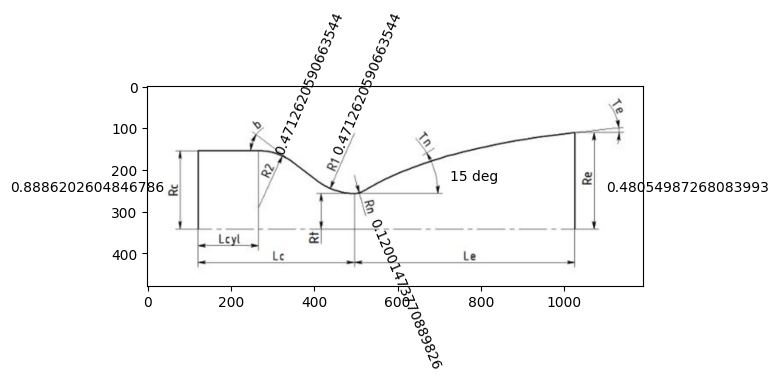

In [123]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('contour.png')

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Add the label
ax.text(440, 160, f'{R1}', fontsize=10, color='black', rotation=67)
ax.text(300, 160, f'{R2}', fontsize=10, color='black', rotation=67)
ax.text(525, 675, f'{Rn}', fontsize=10, color='black', rotation=-67)
ax.text(1100, 250, f'{diaine}', fontsize=10, color='black')
ax.text(725, 225, f'{15} deg', fontsize=10, color='black')
ax.text(-330, 250, f'{Dci}', fontsize=10, color='black')
# x, y are coordinates for the label position
# fontsize, color, ha (horizontal alignment), va (vertical alignment) can be adjusted

# Remove axes for cleaner look (optional)
#ax.axis('off')

# Show the plot
plt.show()